In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sys
from sklearn import svm, datasets
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"System: {sys.version}")
print(f"Scikit learn: {sklearn.__version__}")

Numpy: 1.24.3
Pandas: 2.0.3
System: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Scikit learn: 1.3.0


In [3]:
df = sns.load_dataset('iris')

In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [12]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


In [14]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.40,0.20,setosa
1,1.40,0.20,setosa
2,1.30,0.20,setosa
3,1.50,0.20,setosa
4,1.40,0.20,setosa


**Using iloc**

In [17]:
df.iloc[:, [2, 3, 4]].head()

,petal_length,petal_width,species
0,1.40,0.20,setosa
1,1.40,0.20,setosa
2,1.30,0.20,setosa
3,1.50,0.20,setosa
4,1.40,0.20,setosa


In [20]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [23]:
df['tmp'] = df['species'].map(species_to_num)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,tmp
0,5.10,3.50,1.40,0.20,setosa,0
1,4.90,3.00,1.40,0.20,setosa,0
2,4.70,3.20,1.30,0.20,setosa,0
3,4.60,3.10,1.50,0.20,setosa,0
4,5.00,3.60,1.40,0.20,setosa,0


In [38]:
df.iloc[-5:]

,sepal_length,sepal_width,petal_length,petal_width,species,tmp
145,6.70,3.00,5.20,2.30,virginica,2
146,6.30,2.50,5.00,1.90,virginica,2
147,6.50,3.00,5.20,2.00,virginica,2
148,6.20,3.40,5.40,2.30,virginica,2
149,5.90,3.00,5.10,1.80,virginica,2


In [24]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [25]:
y = df['tmp']

In [28]:
X.shape

(150, 2)

In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: tmp, Length: 150, dtype: int64

**C ->  regularization parameter. Regularization is a technique used to prevent overfitting in machine learning models. In the context of SVC**

C: It is a positive floating-point number that controls the trade-off between achieving a low training error and a low testing error.
1. smaller value of C means a softer margin, allowing more violations (misclassifications) of the margin but potentially improving generalization by reducing overfitting.
2. A larger value of C imposes a harder margin, penalizing more for misclassifications, which can lead to a smaller margin but might improve accuracy on the training set.

In [31]:
C = 0.001
clf = svm.SVC(kernel="linear", C=C)
clf.fit(X, y)

SVC(C=0.001, kernel='linear')

In [39]:
clf.predict([[1.42, 0.19]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
clf.predict([[5, 2.1]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [41]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1

In [42]:
x_min, x_max

(0.1, 7.9)

In [43]:
y_min, y_max

(0, 3)

**numpy.arange([start,] stop[, step,], dtype=None)**

In [44]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [45]:
xx

array([[0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       ...,
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


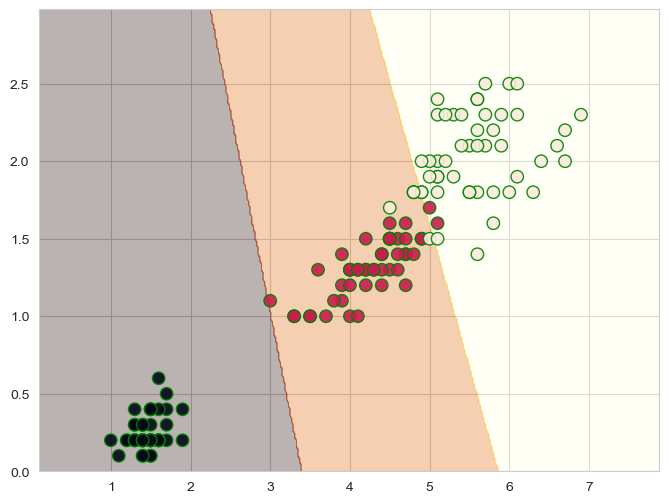

In [46]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');